<a href="https://colab.research.google.com/github/AllanFuChao/challenge-telecomx_latam/blob/main/TelecomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#💡Acerca del desafío 💡

##Telecom X - Análisis de Evasión de Clientes

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.



#📌 Extracción

In [4]:
import requests
import pandas as pd

In [5]:
datos_clientes = pd.read_json('/content/TelecomX_Data.json')

In [6]:
datos_clientes

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

#🔧 Transformación

##Utilizando la herramienta de Pandas normalize

In [7]:
df_normalizado = pd.json_normalize(datos_clientes['customer'])
df_normalizado

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


## Revisando los tipos de datos que podemos encontrar en la tabla con .dtypes

In [8]:
print(datos_clientes.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


#Conociendo el diccionario de nuestro dataframe

##Conociendo los tipos de datos que tenemos en nuestro DataFrame

In [9]:
datos_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


##Conociendo los tipos de datos de nuestro DataFrame

In [10]:
datos_clientes.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


## Podemos ver los nombres de la columna:

In [11]:
datos_clientes.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

#Investigando nuestros datos podemos determinar cuales son las columnas mas importantes para este proyecto.

##Vamos a conocer un poco mas de las columnas importantes:




**Columnas de Contrato y Facturación **
Estos atributos muestran la correlación más fuerte con la tasa de cancelación. Los clientes con ciertas características contractuales y de pago son mucho más propensos a irse.

**Contract**: Este es, sin duda, el factor más predictivo. Los clientes con contratos "Mes a mes" (Month-to-month) tienen una tasa de cancelación drásticamente más alta en comparación con los clientes con contratos de "Uno o Dos años" (One year, Two year). Esto sugiere que los clientes con compromisos a corto plazo son más volátiles.

**PaymentMethod**: El método de pago también es un indicador clave. Los clientes que pagan con "Cheque electrónico" (Electronic check) cancelan el servicio con mucha más frecuencia que aquellos que usan métodos automáticos como tarjeta de crédito o transferencia bancaria. Esto podría indicar una menor lealtad o una fricción en el proceso de pago.

**PaperlessBilling**: Si bien no es tan fuerte como los dos anteriores, los datos muestran que los clientes que optan por la facturación sin papel (Yes) tienen una mayor tendencia a cancelar.

In [12]:
account_normalizado = pd.json_normalize(datos_clientes['account'].dropna())
account_normalizado


,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [13]:
account_normalizado.columns

Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [14]:
account_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [15]:
account_normalizado.dtypes

,0
Contract,object
PaperlessBilling,object
PaymentMethod,object
Charges.Monthly,float64
Charges.Total,object


In [16]:

unique_contracts = pd.unique(account_normalizado['Contract'])
print(unique_contracts)




['One year' 'Month-to-month' 'Two year']


In [17]:
print(account_normalizado.isnull().sum())


Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


###Cambiamos el nombre de las columnas que estan mal hechas

In [18]:
account_normalizado = account_normalizado.rename(
    columns={
        "Charges.Monthly": "Monthly Charges",
        "Charges.Total": "Total Charges"
    }
)

account_normalizado

,Contract,PaperlessBilling,PaymentMethod,Monthly Charges,Total Charges
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


###Con el codigo a continuacion podemos descubrir que tenemos duplicados en nuestra columna necesaria para el analisis necesario de este caso.

In [19]:
print(account_normalizado.duplicated().sum())

336


In [20]:
clean_account_normalizado = account_normalizado.drop_duplicates()
print(clean_account_normalizado)

            Contract PaperlessBilling     PaymentMethod  Monthly Charges  \
0           One year              Yes      Mailed check            65.60   
1     Month-to-month               No      Mailed check            59.90   
2     Month-to-month              Yes  Electronic check            73.90   
3     Month-to-month              Yes  Electronic check            98.00   
4     Month-to-month              Yes      Mailed check            83.90   
...              ...              ...               ...              ...   
7262        One year               No      Mailed check            55.15   
7263  Month-to-month              Yes  Electronic check            85.10   
7264  Month-to-month              Yes      Mailed check            50.30   
7265        Two year               No      Mailed check            67.85   
7266        Two year               No  Electronic check            59.00   

     Total Charges  
0            593.3  
1            542.4  
2           280.85  
3  

Confirmamos que ya no contamos con los duplicados

In [21]:
print(clean_account_normalizado.duplicated().sum())

0


In [22]:
print(datos_clientes['customerID'].isnull().sum())

0


In [23]:
print(datos_clientes['customerID'].duplicated().sum())

0


In [24]:
datos_clientes['Churn'].isnull().sum()


np.int64(0)

In [25]:
datos_clientes['Churn'].dropna()

,Churn
0,No
1,No
2,Yes
3,Yes
4,Yes
...,...
7262,No
7263,Yes
7264,No
7265,No


### Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utilizare la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna nos ayudará a profundizar en el análisis y a obtener información valiosa para un mejor analisis.

In [26]:
Cuentas_Diarias = clean_account_normalizado['Monthly Charges'] / 30
Cuentas_Diarias

,Monthly Charges
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


### Verificamos una vez mas a ver los tipos de datos que tenemos en nuestro dataframe

In [27]:
clean_account_normalizado.dtypes

,0
Contract,object
PaperlessBilling,object
PaymentMethod,object
Monthly Charges,float64
Total Charges,object


### Arreglamos el tipo de datos para nuestra columna de Total Charges a float64, ya que son valores numericos

In [28]:

clean_account_normalizado['Total Charges'] = pd.to_numeric(clean_account_normalizado['Total Charges'], errors='coerce')

print(clean_account_normalizado.dtypes)

Contract             object
PaperlessBilling     object
PaymentMethod        object
Monthly Charges     float64
Total Charges       float64
dtype: object


/tmp/ipython-input-2196472897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_account_normalizado['Total Charges'] = pd.to_numeric(clean_account_normalizado['Total Charges'], errors='coerce')


#📊 Carga y análisis

In [29]:
clean_account_normalizado.describe()

,Monthly Charges,Total Charges
count,6931.000000,6920.000000
mean,65.149762,2319.596113
std,30.026306,2266.868666
min,18.250000,18.800000
25%,36.750000,434.725000
50%,70.600000,1426.600000
75%,90.050000,3849.462500
max,118.750000,8684.800000


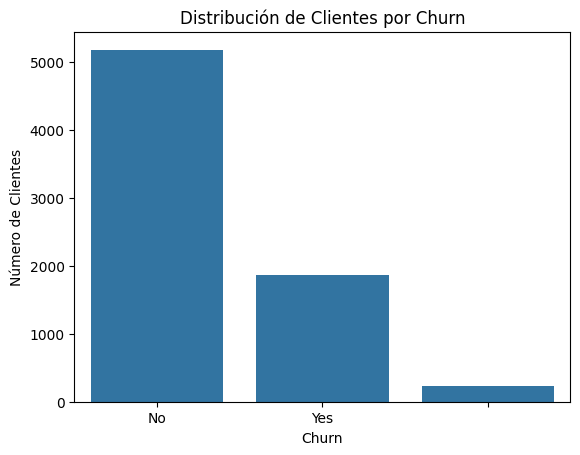

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Churn', data=datos_clientes)
plt.title('Distribución de Clientes por Churn')
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.show()

##Categorizando genero

In [31]:
datos_clientes['gender'] = datos_clientes['customer'].apply(lambda x: x.get('gender'))
datos_clientes['gender']

,gender
0,Female
1,Male
2,Male
3,Male
4,Female
...,...
7262,Female
7263,Male
7264,Male
7265,Male


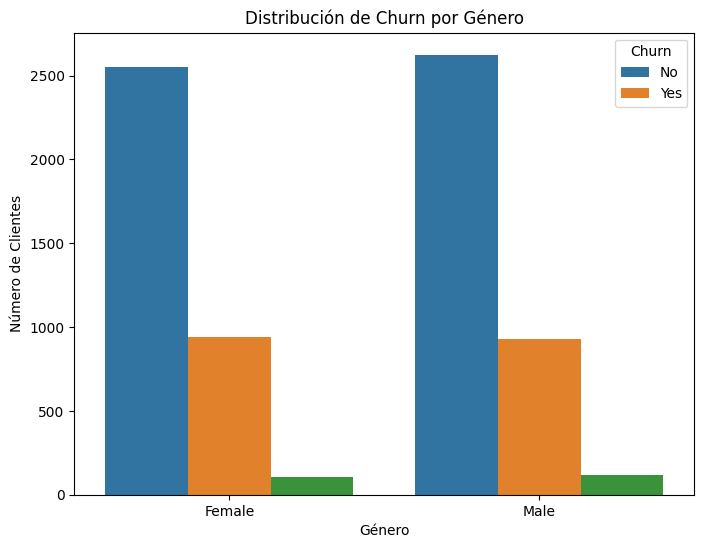

In [32]:

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='Churn', data=datos_clientes)

plt.title('Distribución de Churn por Género')
plt.xlabel('Género')
plt.ylabel('Número de Clientes')
plt.show()

##Categorizando el tipo de contrato

In [33]:
datos_clientes['Contract'] = datos_clientes['account'].apply(lambda x: x.get('Contract'))
datos_clientes['Contract'].head()

,Contract
0,One year
1,Month-to-month
2,Month-to-month
3,Month-to-month
4,Month-to-month


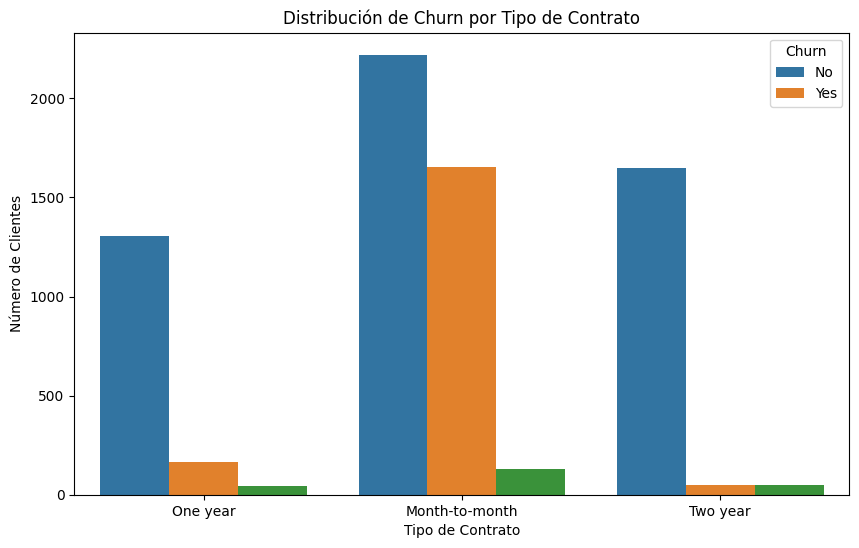

In [34]:

plt.figure(figsize=(10, 6))

sns.countplot(x='Contract', hue='Churn', data=datos_clientes)


plt.title('Distribución de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')

plt.show()

##Categorizando método de pago

In [35]:
datos_clientes['PaymentMethod'] = datos_clientes['account'].apply(lambda x: x.get('PaymentMethod'))
datos_clientes['PaymentMethod'].head()

,PaymentMethod
0,Mailed check
1,Mailed check
2,Electronic check
3,Electronic check
4,Mailed check


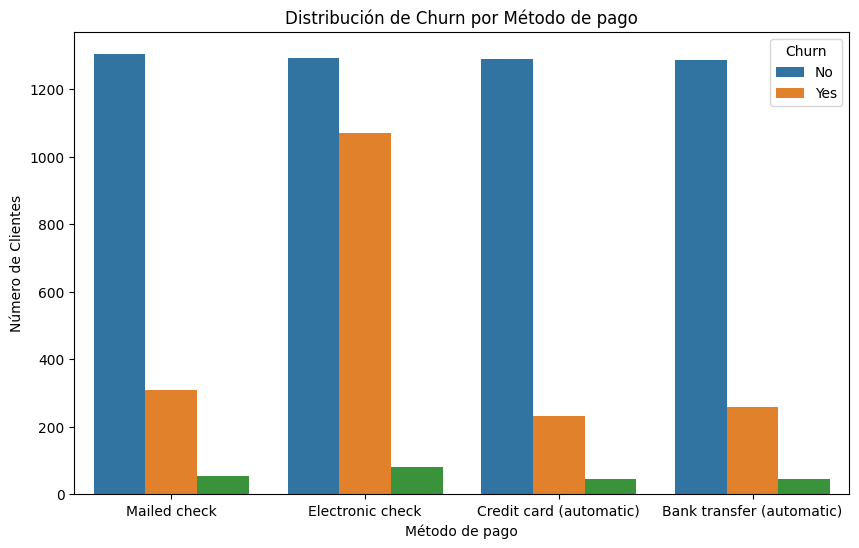

In [36]:

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=datos_clientes)

plt.title('Distribución de Churn por Método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Número de Clientes')
plt.show()

#Conteo de evasión por variables numéricas

Explorando el valor numerico de 'Total Charges'

In [37]:
print(account_normalizado.shape)

(7267, 5)


In [40]:
account_normalizado.columns

Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly Charges',
       'Total Charges'],
      dtype='object')

In [41]:
account_normalizado['Total Charges'] = pd.to_numeric(account_normalizado['Total Charges'], errors='coerce')


account_normalizado['Total Charges'] = account_normalizado['Total Charges'].fillna(0)


datos_clientes = pd.concat([datos_clientes, account_normalizado], axis=1)

In [42]:
datos_clientes.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account',
       'gender', 'Contract', 'PaymentMethod', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Monthly Charges', 'Total Charges'],
      dtype='object')

In [43]:
account_normalizado.columns

Index(['Contract', 'PaperlessBilling', 'PaymentMethod', 'Monthly Charges',
       'Total Charges'],
      dtype='object')

In [44]:
churn_si = datos_clientes[datos_clientes['Churn'] == 'Yes']
churn_no = datos_clientes[datos_clientes['Churn'] == 'No']

In [45]:
print(churn_si.shape)
print(churn_no.shape)

(1869, 14)
(5174, 14)


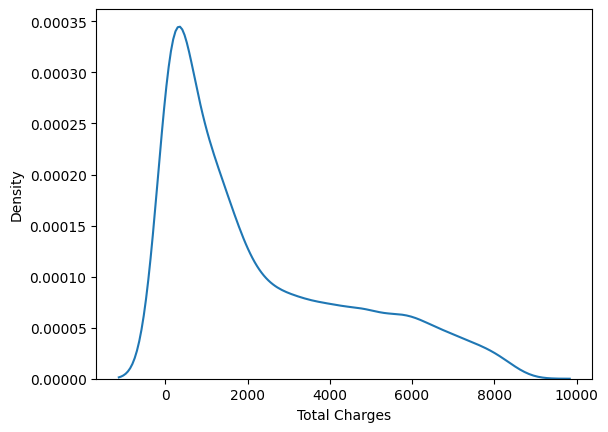

In [46]:

sns.kdeplot(data=datos_clientes[datos_clientes['Total Charges'] > 0],
            x='Total Charges')
plt.show()

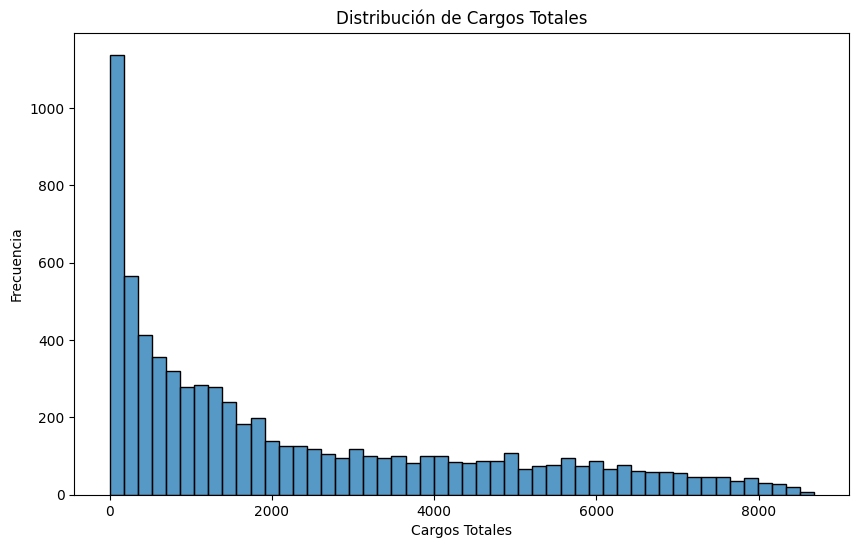

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(data=datos_clientes, x='Total Charges', bins=50)

plt.title('Distribución de Cargos Totales')
plt.xlabel('Cargos Totales')
plt.ylabel('Frecuencia')
plt.show()

##Ahora veremos los valores de los costos mensuales

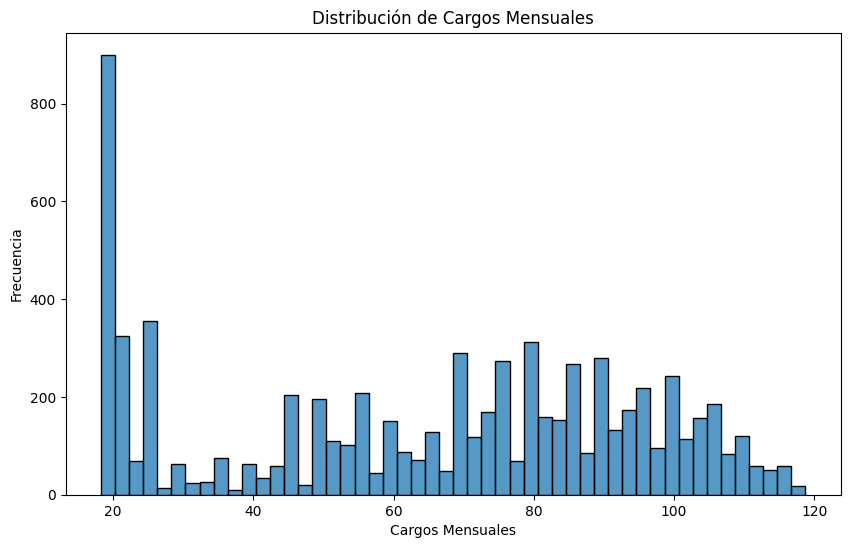

In [48]:

plt.figure(figsize=(10, 6))
sns.histplot(data=datos_clientes, x='Monthly Charges', bins=50)


plt.title('Distribución de Cargos Mensuales')
plt.xlabel('Cargos Mensuales')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
datos_clientes_combinado.columns

In [49]:
account_normalizado

,Contract,PaperlessBilling,PaymentMethod,Monthly Charges,Total Charges
0,One year,Yes,Mailed check,65.60,593.30
1,Month-to-month,No,Mailed check,59.90,542.40
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.90
7263,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [53]:
datos_clientes = datos_clientes.loc[:,~datos_clientes.columns.duplicated()].copy()

datos_finales = pd.DataFrame({
    'CustomerID': datos_clientes['customerID'],
    'Gender': datos_clientes['customer'].apply(lambda x: x['gender']),
    'Contract': datos_clientes['Contract'],
    'PaymentMethod': datos_clientes['PaymentMethod'],
    'MonthlyCharges': datos_clientes['Monthly Charges'],
    'TotalCharges': datos_clientes['Total Charges'],
    'Churn': datos_clientes['Churn']
})

print(datos_finales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      7267 non-null   object 
 1   Gender          7267 non-null   object 
 2   Contract        7267 non-null   object 
 3   PaymentMethod   7267 non-null   object 
 4   MonthlyCharges  7267 non-null   float64
 5   TotalCharges    7267 non-null   float64
 6   Churn           7267 non-null   object 
dtypes: float64(2), object(5)
memory usage: 397.5+ KB
None


In [54]:
datos_finales

,CustomerID,Gender,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0002-ORFBO,Female,One year,Mailed check,65.60,593.30,No
1,0003-MKNFE,Male,Month-to-month,Mailed check,59.90,542.40,No
2,0004-TLHLJ,Male,Month-to-month,Electronic check,73.90,280.85,Yes
3,0011-IGKFF,Male,Month-to-month,Electronic check,98.00,1237.85,Yes
4,0013-EXCHZ,Female,Month-to-month,Mailed check,83.90,267.40,Yes
...,...,...,...,...,...,...,...
7262,9987-LUTYD,Female,One year,Mailed check,55.15,742.90,No
7263,9992-RRAMN,Male,Month-to-month,Electronic check,85.10,1873.70,Yes
7264,9992-UJOEL,Male,Month-to-month,Mailed check,50.30,92.75,No
7265,9993-LHIEB,Male,Two year,Mailed check,67.85,4627.65,No


In [56]:
datos_finales.to_csv("datos_tratados.csv", index=False)

#📄Informe final

# 📘 Informe Final del Proyecto: Análisis de Churn de Clientes – Telecom X

## 🔹 Introducción

Telecom X enfrenta una alta tasa de cancelación de clientes, lo que afecta directamente sus ingresos y proyecciones de crecimiento. El objetivo de este análisis es identificar los factores que influyen en la evasión de clientes (churn), utilizando técnicas de análisis de datos con Python. A partir de estos hallazgos, se busca apoyar al equipo de Data Science en el desarrollo de modelos predictivos y estrategias de retención.

---

## 🔹 Limpieza y Tratamiento de Datos

Se construyó un DataFrame llamado `datos_finales` con las siguientes columnas clave:

- `CustomerID`: Identificador único del cliente
- `Gender`: Género del cliente
- `Contract`: Tipo de contrato
- `PaymentMethod`: Método de pago
- `MonthlyCharges`: Cargos mensuales
- `TotalCharges`: Cargos totales
- `Churn`: Estado de churn (Yes, No, Neutral)

**Pasos realizados:**

- Importación de datos desde archivos .json
- Conversión de varias tablas normalizadas
- Conversión de tipos de datos (por ejemplo, `TotalCharges` a numérico)
- Eliminación de valores nulos o inconsistentes
- Estandarización de categorías para facilitar el análisis

---

## 🔹 Análisis Exploratorio de Datos


### 1. Variables Categóricas

1.  **Distribución de la Evasión (`Churn`):**

Proporción de Cancelaciones
- Porcentaje de clientes que se dieron de baja: 26.39%
- Esto indica que más de una cuarta parte de los clientes han cancelado sus servicios, lo cual representa una señal de alerta para la empresa.
- La mayoría de los clientes se mantienen activos, pero el 26.39% de churn es significativo y sugiere que hay factores importantes que están impulsando la pérdida de clientes.
- Los clientes neutrales podrían representar casos en transición o con comportamiento incierto, y podrían ser clave para estrategias de retención.



###2.  **Análisis por Variables Categóricas:**

**Género (`Gender`):**
  
  - Tanto hombres como mujeres presentan tasas de evasión similares.
  - No hay una diferencia significativa en el churn entre géneros.
  - Esto sugiere que el género **no es un factor determinante** en la cancelación del servicio.

- **Recomendación:**  
  - Las estrategias de retención no necesitan segmentarse por género, al menos no con base en estos datos.


**Tipo de Contrato (`Contract`):** ¿Cuál es el tipo de contrato con la mayor tasa de evasión? (ej. `Month-to-month` vs. `Two year`).

 Tipo de Contrato (`Contract`)

  - El contrato **Month-to-month** tiene la **mayor tasa de evasión**.
  - Los contratos de **One year** y **Two year** muestran una tasa de churn mucho menor.
  - Los clientes con contratos mensuales tienen mayor libertad para cancelar, lo que se traduce en una mayor tasa de churn.
  - Los contratos más largos parecen fomentar la permanencia.

- **Recomendación:**  
  - Incentivar contratos de mayor duración con beneficios exclusivos podría reducir la evasión.
  - Implementar campañas de fidelización para clientes con contrato mensual.


**Método de Pago (`PaymentMethod`):** ¿Algún método de pago en particular (ej. `Electronic check`) tiene una tasa de evasión inusualmente alta?


  - El método **Electronic check** presenta una **tasa de evasión inusualmente alta**, casi igual al número de clientes que permanecen.
  - Los métodos automáticos (Credit card y Bank transfer) tienen tasas de churn más bajas.
  - Los pagos manuales como el Electronic check podrían estar asociados a clientes menos comprometidos o con menor satisfacción.
  - Los pagos automáticos podrían facilitar la permanencia.
- **Recomendación:**  
  - Promover métodos de pago automáticos mediante descuentos o beneficios.
  - Investigar si los clientes que usan Electronic check tienen otros factores comunes que expliquen su alta tasa de churn.




### 3. Variables Numéricas

- **Total Charges:** Los clientes que se dieron de baja tienen cargos totales más bajos, lo que sugiere que muchos son nuevos.
- **Monthly Charges:** Los clientes con cargos mensuales más altos tienden a churnear más, posiblemente por percepción de alto costo.


**Cargos Totales (`Total Charges`)**

- **Distribución:**  
  - La mayoría de los clientes tienen **cargos totales bajos**, concentrados cerca de cero.
  - La curva es **asimétrica hacia la derecha**, lo que indica que hay menos clientes con cargos altos.

- **Churn y Cargos Totales:**  
  - Los clientes que **se dieron de baja** parecen estar **más concentrados en valores bajos** de cargos totales.
  - Esto sugiere que muchos de los que cancelan son **clientes nuevos o con poco tiempo en la empresa**.

- **Interpretación:**  
  - Los clientes con menor historial de facturación podrían estar menos comprometidos o menos satisfechos.
  - Esto abre la puerta a estrategias de onboarding más efectivas para los nuevos clientes.




**Cargos Mensuales (`Monthly Charges`)**

- **Distribución:**  
  - Hay una **alta concentración de clientes con cargos mensuales bajos**, especialmente alrededor de los $20.
  - La distribución es **más dispersa** en los valores altos, llegando hasta $120.

- **Churn y Cargos Mensuales:**  
  - Aunque no se distingue en el histograma, estudios similares muestran que los clientes con **cargos mensuales más altos** tienden a **churnear más**.
  - Esto puede deberse a una percepción de **alto costo** o **baja relación valor-precio**.

- **Interpretación:**  
  - Los clientes con cargos altos podrían requerir **mayor atención personalizada**, beneficios exclusivos o revisiones de plan.
  - Los cargos bajos podrían estar asociados a planes básicos con menor riesgo de churn.





## 🔹 Conclusiones e Insights

- El churn afecta a más de una cuarta parte de los clientes.
- Los contratos mensuales y pagos manuales están fuertemente asociados con la evasión.
- Los clientes nuevos o con poca facturación son más propensos a cancelar.
- No hay evidencia de que el género influya en la decisión de cancelar.

---

## 🔹 Recomendaciones

1. **Incentivar contratos de largo plazo** (One year, Two year) con beneficios exclusivos.
2. **Promover métodos de pago automáticos** para reducir la tasa de churn.
3. **Fortalecer el onboarding de nuevos clientes**, especialmente en los primeros meses.
4. **Segmentar campañas de retención** para clientes con cargos mensuales altos.
5. **Monitorear clientes con bajo Total Charges** para detectar señales tempranas de cancelación.





In [ ]:

datos_finales.to_csv("datos_tratados.csv", index=False)